## Preparation

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import torch

def format_pytorch_version(version):
    return version.split('+')[0]

def format_cuda_version(version):
    return 'cu' + version.replace('.', '')

TORCH_version = torch.__version__
TORCH = format_pytorch_version(TORCH_version)
CUDA_version = torch.version.cuda
CUDA = format_cuda_version(CUDA_version)

In [ ]:
!pip install torch-scatter -f https://pytorch-geometric.com/whl/torch-{TORCH}+{CUDA}.html
!pip install torch-sparse -f https://pytorch-geometric.com/whl/torch-{TORCH}+{CUDA}.html
!pip install torch-cluster -f https://pytorch-geometric.com/whl/torch-{TORCH}+{CUDA}.html
!pip install torch-spline-conv -f https://pytorch-geometric.com/whl/torch-{TORCH}+{CUDA}.html
!pip install torch-geometric
!pip install torch_geometric

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://pytorch-geometric.com/whl/torch-1.12.1+cu113.html
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://pytorch-geometric.com/whl/torch-1.12.1+cu113.html
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://pytorch-geometric.com/whl/torch-1.12.1+cu113.html
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://pytorch-geometric.com/whl/torch-1.12.1+cu113.html
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import torch_geometric

torch_geometric.__version__


'2.1.0'

In [ ]:
from torch_geometric.data import Data 

In [ ]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
from torchvision import transforms
from PIL import Image
import torchvision
!pip install ftfy
!pip install shap
!pip install transformers

# Authenticate
drive = None
def authenticate():
    global drive
    auth.authenticate_user()
    gauth = GoogleAuth()
    gauth.credentials = GoogleCredentials.get_application_default()
    drive = GoogleDrive(gauth)

#Download files
def downloadFiles(fileIds):
    authenticate()
    for fileId in fileIds:    
        downloaded = drive.CreateFile({"id": fileId[1]})
        downloaded.GetContentFile(fileId[0])

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#Download file if not existing
try:
  _ = open("bpe_simple_vocab_16e6.txt.gz", "r")
except:
  downloadFiles([["bpe_simple_vocab_16e6.txt.gz", "1sazrmZm-bsAyLap-kvFCVn8uXdGppVo-"]])

try:
  _ = open("clip_model.pt", "r")
except:
  downloadFiles([["clip_model.pt", "1UO7E2nu_4-C5RRcTtYKqCRjLPUtzV2NQ"]])

try:
  _ = open("Sample.zip", "r")
except:
  downloadFiles([["Sample.zip", "1wIUd5ojRMm1SDRHmk0aZPT63shNiK2aD"]])

downloadFiles([["harmp_memes_tgt.zip", "1K6xfdut1J4DaAZipcyby3MuhgaaJPsGP"]])
downloadFiles([["harmc_memes_tgt.zip", "1v9Dme-EAJhdsFqDGxl8IeSuYa6sQw7ey"]])

In [ ]:
import zipfile
f = zipfile.ZipFile("Sample.zip", "r")
for file in f.namelist():
    f.extract(file, "./")
f.close()

f = zipfile.ZipFile("harmp_memes_tgt.zip", "r")
for file in f.namelist():
    f.extract(file, "./")
f.close()

f = zipfile.ZipFile("harmc_memes_tgt.zip", "r")
for file in f.namelist():
    f.extract(file, "./")
f.close()

In [ ]:
import torch 
import torchvision
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader
from torchvision.transforms import Compose, Resize, CenterCrop, ToTensor, Normalize
# from torchnlp import encoders
from PIL import Image
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
from sklearn.metrics import hamming_loss
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import  mean_absolute_error
from sklearn.preprocessing import OneHotEncoder, MultiLabelBinarizer
from pathlib import Path
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

import gzip
import html
import os
from functools import lru_cache

import ftfy
import regex as re
import shap

cuda


## Load Data

In [ ]:
data_dir_cov = 'Sample/Harm-P/images'
train_path_cov = "Sample/Harm-P/Harm-P-Full/train.jsonl"
dev_path_cov   = "Sample/Harm-P/Harm-P-Full/val.jsonl"
test_path_cov  = "Sample/Harm-P/Harm-P-Full/test.jsonl"

#train_path_cov_tar = "/content/harmc_memes_tgt/target_train.jsonl"
#dev_path_cov_tar   = "/content/harmc_memes_tgt/target_val.jsonl"
#test_path_cov_tar  = "/content/harmc_memes_tgt/target_test.jsonl"


train_samples_frame_cov = pd.read_json(train_path_cov, lines=True)

test_samples_frame_cov = pd.read_json(test_path_cov, lines=True)
print(test_samples_frame_cov.shape)

dev_samples_frame_cov = pd.read_json(dev_path_cov, lines=True)
print(dev_samples_frame_cov.shape)

test_samples_frame_cov.head()

(355, 4)
(177, 4)


,id,image,labels,text
0,memes_5145,memes_5145.png,[not harmful],"""IT'S BEEN THE SAME\nSTORY EVER SINCE\nI CAN R..."
1,memes_1189,memes_1189.png,"[somewhat harmful, organization]","WE ARE LEADERS\nR\nOF THE PARTY OF HATE,\nDIVI..."
2,memes_8188,memes_8188.png,[not harmful],WE NEED TO BUILDA WALL\nph\nNOT TO KEEP THEM O...
3,memes_3480,memes_3480.png,[not harmful],"LIBERTARIAN\n""A PERSON WHO DOESN'T\nFOLLOW UP ..."
4,memes_4345,memes_4345.png,[not harmful],THE MODERATORS 12 MINUTES INTO\nTHE TRUMP-BIDẺ...


In [ ]:
@lru_cache()
def bytes_to_unicode():
    """
    Returns list of utf-8 byte and a corresponding list of unicode strings.
    The reversible bpe codes work on unicode strings.
    This means you need a large # of unicode characters in your vocab if you want to avoid UNKs.
    When you're at something like a 10B token dataset you end up needing around 5K for decent coverage.
    This is a signficant percentage of your normal, say, 32K bpe vocab.
    To avoid that, we want lookup tables between utf-8 bytes and unicode strings.
    And avoids mapping to whitespace/control characters the bpe code barfs on.
    """
    bs = list(range(ord("!"), ord("~")+1))+list(range(ord("¡"), ord("¬")+1))+list(range(ord("®"), ord("ÿ")+1))
    cs = bs[:]
    n = 0
    for b in range(2**8):
        if b not in bs:
            bs.append(b)
            cs.append(2**8+n)
            n += 1
    cs = [chr(n) for n in cs]
    return dict(zip(bs, cs))

In [ ]:
def get_pairs(word):
    """Return set of symbol pairs in a word.
    Word is represented as tuple of symbols (symbols being variable-length strings).
    """
    pairs = set()
    prev_char = word[0]
    for char in word[1:]:
        pairs.add((prev_char, char))
        prev_char = char
    return pairs


def basic_clean(text):
    text = ftfy.fix_text(text)
    text = html.unescape(html.unescape(text))
    return text.strip()


def whitespace_clean(text):
    text = re.sub(r'\s+', ' ', text)
    text = text.strip()
    return text


class SimpleTokenizer(object):
    def __init__(self, bpe_path: str = "bpe_simple_vocab_16e6.txt.gz"):
        self.byte_encoder = bytes_to_unicode()
        self.byte_decoder = {v: k for k, v in self.byte_encoder.items()}
        merges = gzip.open(bpe_path).read().decode("utf-8").split('\n')
        merges = merges[1:49152-256-2+1]
        merges = [tuple(merge.split()) for merge in merges]
        vocab = list(bytes_to_unicode().values())
        vocab = vocab + [v+'</w>' for v in vocab]
        for merge in merges:
            vocab.append(''.join(merge))
        vocab.extend(['<|startoftext|>', '<|endoftext|>'])
        self.encoder = dict(zip(vocab, range(len(vocab))))
        self.decoder = {v: k for k, v in self.encoder.items()}
        self.bpe_ranks = dict(zip(merges, range(len(merges))))
        self.cache = {'<|startoftext|>': '<|startoftext|>', '<|endoftext|>': '<|endoftext|>'}
        self.pat = re.compile(r"""<\|startoftext\|>|<\|endoftext\|>|'s|'t|'re|'ve|'m|'ll|'d|[\p{L}]+|[\p{N}]|[^\s\p{L}\p{N}]+""", re.IGNORECASE)

    def bpe(self, token):
        if token in self.cache:
            return self.cache[token]
        word = tuple(token[:-1]) + ( token[-1] + '</w>',)
        pairs = get_pairs(word)

        if not pairs:
            return token+'</w>'

        while True:
            bigram = min(pairs, key = lambda pair: self.bpe_ranks.get(pair, float('inf')))
            if bigram not in self.bpe_ranks:
                break
            first, second = bigram
            new_word = []
            i = 0
            while i < len(word):
                try:
                    j = word.index(first, i)
                    new_word.extend(word[i:j])
                    i = j
                except:
                    new_word.extend(word[i:])
                    break

                if word[i] == first and i < len(word)-1 and word[i+1] == second:
                    new_word.append(first+second)
                    i += 2
                else:
                    new_word.append(word[i])
                    i += 1
            new_word = tuple(new_word)
            word = new_word
            if len(word) == 1:
                break
            else:
                pairs = get_pairs(word)
        word = ' '.join(word)
        self.cache[token] = word
        return word

    def encode(self, text):
        bpe_tokens = []
        text = whitespace_clean(basic_clean(text)).lower()
        for token in re.findall(self.pat, text):
            token = ''.join(self.byte_encoder[b] for b in token.encode('utf-8'))
            bpe_tokens.extend(self.encoder[bpe_token] for bpe_token in self.bpe(token).split(' '))
        return bpe_tokens

    def decode(self, tokens):
        text = ''.join([self.decoder[token] for token in tokens])
        text = bytearray([self.byte_decoder[c] for c in text]).decode('utf-8', errors="replace").replace('</w>', ' ')
        return text

In [ ]:
## Load the ROI features (Covid)
train_ROI_cov = torch.load("Sample/features/harmeme_ROI_MOMENTA/cov/memes_harmfulness/harmeme_cov_train_ROI.pt")
val_ROI_cov = torch.load("Sample/features/harmeme_ROI_MOMENTA/cov/memes_harmfulness/harmeme_cov_val_ROI.pt")
test_ROI_cov = torch.load("Sample/features/harmeme_ROI_MOMENTA/cov/memes_harmfulness/harmeme_cov_test_ROI.pt")
# Load the ENT features
train_ENT_cov = torch.load("Sample/features/harmeme_ENT_MOMENTA/cov/harmeme_cov_harmfulness/harmeme_cov_train_ent.pt")
val_ENT_cov = torch.load("Sample/features/harmeme_ENT_MOMENTA/cov/harmeme_cov_harmfulness/harmeme_cov_val_ent.pt")
test_ENT_cov = torch.load("Sample/features/harmeme_ENT_MOMENTA/cov/harmeme_cov_harmfulness/harmeme_cov_test_ent.pt")


## Data Loader

In [ ]:
preprocess = Compose([
    Resize([100,100]),
    ToTensor()
    ])
tokenizer = SimpleTokenizer()
from torchvision import transforms
def img_feature_representation(in_img):
    image = Image.open(in_img)
    image = preprocess((image.convert('RGB')))
    image = torch.tensor(np.stack(image)).cuda()
    mean, std = image.mean([1,2]), image.std([1,2])
    image -= mean[:, None, None]
    image /= std[:, None, None]    
    return image
 

In [ ]:
import torchvision
from torchvision.models.detection import fasterrcnn_resnet50_fpn, FasterRCNN_ResNet50_FPN_Weights
fater_RCNN_model = torchvision.models.detection.fasterrcnn_resnet50_fpn(weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT).to(device)

In [ ]:
def fater_RCNN_process(model,image_FRCNN_input,image):
    # get region_feature 
    model.eval()
    region_feature = []
    score_threshold = .5
    model.to(device)
    with torch.no_grad():
      prediction = model([image_FRCNN_input.to(device)])
      if len(prediction[0]['scores'])!=0:
        max_score= prediction[0]['scores'][0]
        max_num=0
        for score in prediction[0]['scores']:
          i=0
          if prediction[0]['scores'][i] > max_score:
            max_score = prediction[0]['scores'][i]
          i+=1

        boxes=prediction[0]['boxes'][prediction[0]['scores'] == max_score]
      else: 
        boxes=prediction[0]['boxes']
      # print(boxes) tensor([[  0.0000, 346.7071, 369.1440, 647.5507]], device='cuda:0')
  
     
    # get crop img
    im = Image.open(image)
   
    width, height = im.size
    if len(boxes)!=0:
      left = float(boxes[0][0].cpu().detach().numpy()) 
      top = float(boxes[0][1].cpu().detach().numpy())
      right = float(boxes[0][2].cpu().detach().numpy())
      bottom = float(boxes[0][3].cpu().detach().numpy())
      im1 = im.crop((left, top, right, bottom))
    else:
      im1 = im
    resize = torchvision.transforms.Resize([100,100])
    im1 = resize(im1)
    # print(im1.size) #100
    return im1

In [ ]:
def fater_RCNN_process(model,image_FRCNN_input,image):
    # get region_feature 
    model.eval()
    region_feature = []
    score_threshold = .5
    model.to(device)
    with torch.no_grad():
      prediction = model([image_FRCNN_input.to(device)])
      if len(prediction[0]['scores'])!=0:
       
        boxes=prediction[0]['boxes'][prediction[0]['scores'] >score_threshold ]
      else: 
        boxes=prediction[0]['boxes']
    #print(boxes)
    boxes = torch.mean(boxes, axis=0)
     
    # get crop img
    im = Image.open(image)
   
    width, height = im.size
    if math.isnan(boxes[0]) and math.isnan(boxes[1]) and math.isnan(boxes[2]) and math.isnan(boxes[3]):
        im1 = im
    else: 
        left = float(boxes[0].cpu().detach().numpy()) 
        top = float(boxes[1].cpu().detach().numpy())
        right = float(boxes[2].cpu().detach().numpy())
        bottom = float(boxes[3].cpu().detach().numpy())
        im1 = im.crop((left, top, right, bottom))
    resize = torchvision.transforms.Resize([100,100])
    im1 = resize(im1)
    # print(im1.size) #100
    return im1

In [ ]:
from transformers import DeiTFeatureExtractor, DeiTModel
import torch


img_trans_feature_extractor = DeiTFeatureExtractor.from_pretrained("facebook/deit-base-distilled-patch16-224")
img_trans_model = DeiTModel.from_pretrained("facebook/deit-base-distilled-patch16-224")

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


Moving 0 files to the new cache system


0it [00:00, ?it/s]

Some weights of the model checkpoint at facebook/deit-base-distilled-patch16-224 were not used when initializing DeiTModel: ['distillation_classifier.weight', 'cls_classifier.bias', 'distillation_classifier.bias', 'cls_classifier.weight']
- This IS expected if you are initializing DeiTModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DeiTModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DeiTModel were not initialized from the model checkpoint at facebook/deit-base-distilled-patch16-224 and are newly initialized: ['deit.pooler.dense.weight', 'deit.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference

In [ ]:
from transformers import BertTokenizer, BertModel
bert_tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')    #不同模型不同加载
bert_model = BertModel.from_pretrained("bert-base-uncased")

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
class GCNLayer(nn.Module):
    
    def __init__(self, c_in, c_out):
        super().__init__()
        self.projection = nn.Linear(c_in, c_out)
    
    def forward(self, node_feats, adj_matrix):
        """
        Inputs:
            node_feats - Tensor with node features of shape [batch_size, num_nodes, c_in]
            adj_matrix - Batch of adjacency matrices of the graph. If there is an edge from i to j, adj_matrix[b,i,j]=1 else 0.
                         Supports directed edges by non-symmetric matrices. Assumes to already have added the identity connections. 
                         Shape: [batch_size, num_nodes, num_nodes]
        """
        # Num neighbours = number of incoming edges
        num_neighbours = adj_matrix.sum(dim=-1, keepdims=True)
        node_feats = self.projection(node_feats)
        node_feats = torch.bmm(adj_matrix, node_feats)
        node_feats = node_feats / num_neighbours
        return node_feats


In [ ]:
class HarmemeMemesDatasetAug2_cov(torch.utils.data.Dataset):
    """Uses jsonl data to preprocess and serve 
    dictionary of multimodal tensors for model input.
    """
    def __init__(
        self,
        data_path,
        img_dir,
        split_flag=None,
        balance=False,
        dev_limit=None,
        random_state=0,
    ):

        self.samples_frame = pd.read_json(
            data_path, lines=True
        )
        self.samples_frame = self.samples_frame.reset_index(
            drop=True
        )
        self.samples_frame.image = self.samples_frame.apply(
            lambda row: (img_dir + '/' + row.image), axis=1
        )
        if split_flag=='train':
            self.ROI_samples = train_ROI_cov
            self.ENT_samples = train_ENT_cov
        elif split_flag=='val':
            self.ROI_samples = val_ROI_cov
            self.ENT_samples = val_ENT_cov
        else:
            self.ROI_samples = test_ROI_cov
            self.ENT_samples = test_ENT_cov
        
    def __len__(self):
        return len(self.samples_frame)

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()
        img_id = self.samples_frame.loc[idx, "id"]
        # img_file_name = self.samples_frame.loc[idx, "image"]
        preprocess = Compose([
                    Resize([100,100]),
                    ToTensor()
                    ])
        image_FRCNN_input = img_feature_representation(self.samples_frame.loc[idx, "image"]) 
        FRCNNt_feature = fater_RCNN_process(fater_RCNN_model,image_FRCNN_input,self.samples_frame.loc[idx, "image"]) #image(224,224)
        FRCNNt_feature = preprocess((FRCNNt_feature.convert('RGB')))
        img_trams_inputs = img_trans_feature_extractor(FRCNNt_feature, return_tensors="pt")
        img_trams_outputs = img_trans_model(**img_trams_inputs)
        img_trams_last_hidden_states = img_trams_outputs.last_hidden_state[:,1:,:] # [batch_size, tokens, hidden_dim]

        cls_img = img_trams_outputs.last_hidden_state[:,0,:]
        # img_trams_last_hidden_states = img_trams_outputs.pooler_output

        # text
        # text_info = text_feature_representation(self.samples_frame.loc[idx, "text"])
        text_info = (self.samples_frame.loc[idx, "text"])
        bert_input = bert_tokenizer(text_info, return_tensors='pt',truncation=True, max_length=50,padding="max_length")
        bert_feature = bert_model(**bert_input)
        text_node_feats = bert_feature.last_hidden_state[:,1:,:]
        cls_text = bert_feature.last_hidden_state[:,0,:]
        # text_node_feats = bert_feature.pooler_output
        #print(text_node_feats.shape)
        '''
        c_in = text_node_feats.shape[1] # 197
        c_out = c_in
        array = np.zeros((text_node_feats.shape[2])) 
        bias = torch.tensor(array)
        array = np.identity((text_node_feats.shape[2]),dtype = np.double)
        weight = torch.tensor(array)
        array = np.ones((c_in, c_in))
        tensor1 = torch.tensor(array)
        adj_matrix = tensor1.unsqueeze(0)
        layer = GCNLayer(c_in, c_out).cuda()
        layer.projection.weight.data = weight.cuda().float()
        layer.projection.bias.data = bias.cuda().float()
       
        with torch.no_grad():
            text_gnn_out_feats = layer(text_node_feats.cuda().float(), adj_matrix.cuda().float())
        '''
        if "labels" in self.samples_frame.columns:

            if self.samples_frame.loc[idx, "labels"][0]=="not harmful":
                lab=0
            else:
                lab=1  
   
            label = torch.tensor(lab).to(device)  

            
            sample = {
                "id": img_id, 
                "image_FRCNN_input": image_FRCNN_input,
                #"FRCNNt_feature": FRCNNt_feature,
                'img_trams_last_hidden_states':img_trams_last_hidden_states,
                'text_node_feats':text_node_feats,
                'cls_img':cls_img,
                'cls_text':cls_text,
                #'gnn_out_feats':gnn_out_feats,
                #'bert_feature':bert_feature,
                #'text_gnn_out_feats':text_gnn_out_feats,
                "label": label
            }
        

        else:
            sample = {
                "id": img_id, 
                "image_FRCNN_input": image_FRCNN_input,
                #"FRCNNt_feature": FRCNNt_feature,
                'img_trams_last_hidden_states':img_trams_last_hidden_states,
                'text_node_feats':text_node_feats,
                'cls_img':cls_img,
                'cls_text':cls_text,
                #'bert_feature':bert_feature,
                #'gnn_out_feats':gnn_out_feats,
                #'text_gnn_out_feats':text_gnn_out_feats,
            }
        #print(sample)
        return sample

In [ ]:
batch_size = 32
hm_dataset_train_cov = HarmemeMemesDatasetAug2_cov(train_path_cov, data_dir_cov, split_flag='train')
dataloader_train_cov = DataLoader(hm_dataset_train_cov, batch_size=batch_size,
                        shuffle=True, num_workers=0)

hm_dataset_val_cov = HarmemeMemesDatasetAug2_cov(dev_path_cov, data_dir_cov, split_flag='val')
dataloader_val_cov = DataLoader(hm_dataset_val_cov, batch_size=batch_size,
                        shuffle=True, num_workers=0)
hm_dataset_test_cov = HarmemeMemesDatasetAug2_cov(test_path_cov, data_dir_cov, split_flag='test')
dataloader_test_cov = DataLoader(hm_dataset_test_cov, batch_size=batch_size,
                        shuffle=False, num_workers=0)

## Define Model

In [ ]:
import torch
from torch import Tensor
from torch_geometric.nn import GCNConv
from torch_geometric.datasets import Planetoid


class GCN(torch.nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels):
        super().__init__()
        self.conv1 = GCNConv(in_channels, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, out_channels)

    def forward(self, x: Tensor, edge_index: Tensor) -> Tensor:
        # x: Node feature matrix of shape [num_nodes, in_channels]
        # edge_index: Graph connectivity matrix of shape [2, num_edges]
        x = self.conv1(x, edge_index).relu()
        x = self.conv2(x, edge_index)
        return x



In [ ]:
import torch
import torch.nn as nn


class GraphConvolution(nn.Module):
    def __init__( self, input_dim, \
                        output_dim, \
                        support, \
                        act_func = None, \
                        featureless = False, \
                        dropout_rate = 0., \
                        bias=False):
        super(GraphConvolution, self).__init__()
        self.support = support
        self.featureless = featureless
        #self.linear = nn.Linear(input_dim,output_dim)
        for i in range(len(self.support)):
            setattr(self, 'W{}'.format(i), nn.Parameter(torch.randn(input_dim, output_dim)))

        if bias:
            self.b = nn.Parameter(torch.zeros(1, output_dim))

        self.act_func = act_func
        self.dropout = nn.Dropout(dropout_rate)

        
    def forward(self, x):
        x = self.dropout(x)

        for i in range(len(self.support)):
            if self.featureless:
                pre_sup = getattr(self, 'W{}'.format(i))
            else:
                pre_sup = x.mm(getattr(self, 'W{}'.format(i)))
            
            if i == 0:
                out = self.support[i].mm(pre_sup)
            else:
                out += self.support[i].mm(pre_sup)

        if self.act_func is not None:
            out = self.act_func(out)

        self.embedding = out
        return out

In [ ]:
class GATLayer(nn.Module):
    
    def __init__(self, c_in, c_out, num_heads=1, concat_heads=True, alpha=0.2):
        """
        Inputs:
            c_in - Dimensionality of input features
            c_out - Dimensionality of output features
            num_heads - Number of heads, i.e. attention mechanisms to apply in parallel. The 
                        output features are equally split up over the heads if concat_heads=True.
            concat_heads - If True, the output of the different heads is concatenated instead of averaged.
            alpha - Negative slope of the LeakyReLU activation.
        """
        super().__init__()
        self.num_heads = num_heads
        self.concat_heads = concat_heads
        if self.concat_heads:
            assert c_out % num_heads == 0, "Number of output features must be a multiple of the count of heads."
            c_out = c_out // num_heads
        
        # Sub-modules and parameters needed in the layer
        self.projection = nn.Linear(c_in, c_out * num_heads)
        self.a = nn.Parameter(torch.Tensor(num_heads, 2 * c_out)) # One per head
        self.leakyrelu = nn.LeakyReLU(alpha)
        
        # Initialization from the original implementation
        nn.init.xavier_uniform_(self.projection.weight.data, gain=1.414)
        nn.init.xavier_uniform_(self.a.data, gain=1.414)
        
    def forward(self, node_feats, adj_matrix, print_attn_probs=False):
        """
        Inputs:
            node_feats - Input features of the node. Shape: [batch_size, c_in]
            adj_matrix - Adjacency matrix including self-connections. Shape: [batch_size, num_nodes, num_nodes]
            print_attn_probs - If True, the attention weights are printed during the forward pass (for debugging purposes)
        """
        batch_size, num_nodes = node_feats.size(0), node_feats.size(1)
        
        # Apply linear layer and sort nodes by head
        node_feats = self.projection(node_feats)
        node_feats = node_feats.view(batch_size, num_nodes, self.num_heads, -1)
        
        # We need to calculate the attention logits for every edge in the adjacency matrix 
        # Doing this on all possible combinations of nodes is very expensive
        # => Create a tensor of [W*h_i||W*h_j] with i and j being the indices of all edges
        edges = adj_matrix.nonzero(as_tuple=False) # Returns indices where the adjacency matrix is not 0 => edges
        node_feats_flat = node_feats.view(batch_size * num_nodes, self.num_heads, -1)
        edge_indices_row = edges[:,0] * num_nodes + edges[:,1]
        edge_indices_col = edges[:,0] * num_nodes + edges[:,2]
        a_input = torch.cat([
            torch.index_select(input=node_feats_flat, index=edge_indices_row, dim=0),
            torch.index_select(input=node_feats_flat, index=edge_indices_col, dim=0)
        ], dim=-1) # Index select returns a tensor with node_feats_flat being indexed at the desired positions along dim=0
        
        # Calculate attention MLP output (independent for each head)
        attn_logits = torch.einsum('bhc,hc->bh', a_input, self.a) 
        attn_logits = self.leakyrelu(attn_logits)
        
        # Map list of attention values back into a matrix
        attn_matrix = attn_logits.new_zeros(adj_matrix.shape+(self.num_heads,)).fill_(-9e15)
        attn_matrix[adj_matrix[...,None].repeat(1,1,1,self.num_heads) == 1] = attn_logits.reshape(-1)
        
        # Weighted average of attention
        attn_probs = F.softmax(attn_matrix, dim=2)
        if print_attn_probs:
            print("Attention probs\n", attn_probs.permute(0, 3, 1, 2))
        node_feats = torch.einsum('bijh,bjhc->bihc', attn_probs, node_feats)
        
        # If heads should be concatenated, we can do this by reshaping. Otherwise, take mean
        if self.concat_heads:
            node_feats = node_feats.reshape(batch_size, num_nodes, -1)
        else:
            node_feats = node_feats.mean(dim=2)
        
        return node_feats 

In [ ]:
def build_edge_idx(num_nodes):
    # Initialize edge index matrix
    E = torch.zeros((2, num_nodes * (num_nodes - 1)), dtype=torch.long)
    
    # Populate 1st row
    for node in range(num_nodes):
        for neighbor in range(num_nodes - 1):
            E[0, node * (num_nodes - 1) + neighbor] = node

    # Populate 2nd row
    neighbors = []
    for node in range(num_nodes):
        neighbors.append(list(np.arange(node)) + list(np.arange(node+1, num_nodes)))
    E[1, :] = torch.Tensor([item for sublist in neighbors for item in sublist])
    
    return E


In [ ]:
from torch.nn import Parameter
import math
class GraphConvolution(nn.Module):
    """
    Simple GCN layer, similar to https://arxiv.org/abs/1609.02907
    """

    def __init__(self, in_features, out_features, bias=False):
        super(GraphConvolution, self).__init__()
        self.in_features = in_features
        self.out_features = out_features
        self.weight = Parameter(torch.Tensor(in_features, out_features))
        if bias:
            self.bias = Parameter(torch.Tensor(1, 1, out_features))
        else:
            self.register_parameter('bias', None)
        self.reset_parameters()

    def reset_parameters(self):
        stdv = 1. / math.sqrt(self.weight.size(1))
        self.weight.data.uniform_(-stdv, stdv)
        if self.bias is not None:
            self.bias.data.uniform_(-stdv, stdv)

    def forward(self, input, adj):
        support = torch.bmm(input, self.weight)
        output = torch.bmm(adj, support)
        if self.bias is not None:
            return output + self.bias
        else:
            return output

In [ ]:


# Get the cross attention value features 
# Vanilla model
import torch.nn.functional as F
class CI_GNN(nn.Module):
    def __init__(self,n_out):
        
        super(CI_GNN, self).__init__() 
        '''
        self.fully_img_projection = nn.Linear(768, 768)
        self.fully_text_projection = nn.Linear(768, 768)
        self.elu = torch.nn.ELU()
        self.GNN_att = GATLayer(768,768,num_heads=2)
        self.pool = nn.MaxPool2d(3,stride = 2)
        self.cls_projection = nn.Linear(768,383)
        self.sigmoid = nn.Sigmoid()
        self.fully_connected_1 = nn.Linear(56684,4096)
        self.fully_connected_2 = nn.Linear(4096,64)
        self.relu = torch.nn.ReLU()
        self.out = nn.Linear(64,n_out)
        self.softmax = nn.Softmax(dim=1)
        '''

        self.GCN_img = GCN(768, 512, 256).to(device)
        self.GCN_text = GCN(768, 512, 256).to(device)

        self.fully_img_projection = nn.Linear(768, 512)
        self.fully_text_projection = nn.Linear(768, 512)
        self.fully_img_projection_2 = nn.Linear(512,512)
        self.fully_text_projection_2 = nn.Linear(512,512)
        self.fully_img_projection_3 = nn.Linear(256,128)
        self.fully_text_projection_3 = nn.Linear(256,128)
        self.elu = torch.nn.ELU()

        self.gnn = GraphConvolution(768,768)
        self.GNN_att_mul = GATLayer(128,64,num_heads=1)
        self.GNN_att = GATLayer(64,64,num_heads=1)
        self.pool = nn.MaxPool2d(3,stride = 2)
        self.cls_projection = nn.Linear(768,31) #!!node_size 
        self.sigmoid = nn.Sigmoid()
        self.fully_connected_1 = nn.Linear(3844,1024) 
        self.fully_connected_f = nn.Linear(1024,256)
        self.relu = torch.nn.ReLU()
        self.glue = nn.GELU()
        self.out = nn.Linear(256,n_out)
        self.batchnorm_1 = nn.BatchNorm1d(1024)
        self.batchnorm_f = nn.BatchNorm1d(256)
        self.softmax = nn.Softmax(dim=1)
     
    def fully_img_gnn(self,img,size):
        #print('img.shape',img.shape) img.shape torch.Size([8, 197, 768])

        c_in = img.shape[1] # 197
        c_out = c_in
        array = np.ones((size,c_in, c_in),dtype = np.float64)
        adj_matrix = torch.tensor(array).float().to(device)
        #print('adj_matrix',adj_matrix.shape) adj_matrix torch.Size([8, 198, 198])
        node_feats = img
        num_neighbours = adj_matrix.sum(dim=-1, keepdims=True)
        node_feats = self.fully_img_projection(node_feats)   
        node_feats = torch.bmm(adj_matrix, node_feats)
        node_feats = node_feats / num_neighbours.to(device)
        return node_feats

    def fully_text_gnn(self,text,size):
        #print('text.shape',text.shape) text.shape torch.Size([8, 100, 768])
        c_in = text.shape[1] 
        c_out = c_in
        '''
        array = np.zeros((text.shape[2])) 
        bias = torch.tensor(array).to(device)
        array = np.identity((text.shape[2]))
        weight = torch.tensor(array).to(device)
        '''
        array = np.ones((size,c_in, c_in),dtype = np.float64)
        adj_matrix = torch.tensor(array).float().to(device)
        #print('adj_matrix',adj_matrix.shape) adj_matrix torch.Size([8, 100, 100])
        node_feats = text
        num_neighbours = adj_matrix.sum(dim=-1, keepdims=True)
        node_feats = self.fully_img_projection(node_feats)   
        node_feats = torch.bmm(adj_matrix, node_feats)
        node_feats = node_feats / num_neighbours.to(device)
        return node_feats

    def multi_gnn(self,img,text,size):
        node_feats = torch.concat((img,text), dim = 1) # torch.Size([8, 296, 768])
        c_in = node_feats.shape[1]
        array_1 = np.identity((c_in))
        array_2 = np.ones((size,c_in, c_in))
        array_3 = array_2-array_1
  
        tensor1 = torch.tensor(array_3)
        adj_matrix = tensor1.float().to(device)

        num_neighbours = adj_matrix.sum(dim=-1, keepdims=True)
        #node_feats = self.projection(node_feats)
        node_feats = torch.bmm(adj_matrix, node_feats)
        node_feats = node_feats / num_neighbours
        return node_feats
  
    def gnn_att(self, node,size):
        c_in = node.shape[1] 
        c_out = c_in
        array = np.ones((size,c_in, c_in),dtype = np.float64)
        adj_matrix = torch.tensor(array).float().to(device)
        
        out = self.GNN_att(node,adj_matrix)
        return out

    def gnn_att_11(self, node,size):
       
        c_in = node.shape[1] 
        c_out = c_in
        array = np.ones((size,c_in, c_in),dtype = np.float64)
        adj_matrix = torch.tensor(array).float().to(device)
        out = self.GNN_att_1(node,adj_matrix)
        return out

    def gnn_att_mul(self,img,text,size):
        node_feats = torch.concat((img,text), dim = 1)
        c_in = node_feats.shape[1] 
        c_out = c_in
        array = np.ones((size,c_in, c_in),dtype = np.float64)
        adj_matrix = torch.tensor(array).float().to(device)
        out = self.GNN_att_mul(node_feats,adj_matrix)
        return out

    def feature_fusion(self,node,cls_img,cls_text):
        cls = torch.concat((cls_img,cls_text),dim = 1)
        node_feats = torch.concat((node,cls), dim = 1) # torch.Size([8, 148, 383])
        s_g = self.sigmoid(node_feats) #torch.Size([8, 148, 383])
        s_m = self.sigmoid(node_feats) #torch.Size([8, 148, 383])
        # print(cls.shape) #torch.Size([8, 1, 383])
        # print(node.shape) #torch.Size([8, 147, 383])
        g = torch.bmm(node,s_g.permute(0,2,1)) # torch.Size([8, 147, 148])
        c = torch.bmm(cls,s_m.permute(0,2,1)) # torch.Size([8, 1, 148])
        f_soft = torch.concat((g,c),dim = 1)

        alpha_g = self.sigmoid(node_feats)
        alpha_m = self.sigmoid(node_feats)
        s_g= torch.bernoulli(alpha_g)
        s_m= torch.bernoulli(alpha_m)
        f_hard = torch.concat((g,c),dim = 1)
        return node_feats


    def forward(self, img,text,cls_img,cls_text):
            '''
            if torch.Tensor.dim(img)!= 3:
              img = img.unsqueeze(0)
              text = text.unsqueeze(0)
            size = img.shape[0]  
            # print(img.shape) torch.Size([1, 197, 768])
            # img_node = self.fully_img_gnn(img,size) #[8, 197, 768] 
            # text_node = self.fully_text_gnn(text,size) #[8, 99, 768]
          
            #print('1')
            # print(img_node)
            # print(text_node)
            img_node = self.fully_img_projection_2(img_node) # (1576x512 and 768x512)
            text_node = self.fully_text_projection_2(text_node)
            # print('2')
            # print(img_node)
            # print(text_node)
            img_node = self.elu(img_node)
            text_node = self.elu(text_node)
            # print('3')
            # print(img_node)
            # print(text_node)
            node = self.multi_gnn(img_node,text_node,size)
            # print('4')
            # print(node)

            node = self.gnn_att(node,size) #torch.Size([4, 246, 512])
   
            # print('5')
            # print(node)
            node = self.pool(node) #torch.Size([8, 147, 383]) =>  torch.Size([8, 147, 255]) =>torch.Size([4, 122, 255])
      
  
            # print('6')
            # print(node)

            cls_img = self.cls_projection(cls_img) #torch.Size([8, 1, 383]) 
            cls_text = self.cls_projection(cls_text) 

            # print('7')
            # print(cls)
            fusion_feature = self.feature_fusion(node,cls_img,cls_text) #torch.Size([8, 148, 148])) # torch.Size([8, 148, 383]) => torch.Size([4, 124, 255])
    
            # print('8')
            # print(fusion_feature)
            fusion_feature = torch.flatten(fusion_feature, 1) #torch.Size([8, 21904]) => torch.Size([8, 37995]) =>torch.Size([4, 31620])
 
            # print('9')
            # print(fusion_feature)
            fusion_feature = self.sigmoid(self.fully_connected_1(fusion_feature)) #8x37995  (4x31620 and 37995x16384)
            # print('9.1')
            # print(fusion_feature)
            fusion_feature = self.sigmoid(self.fully_connected_1_1(fusion_feature)) #8x37995 
            # print('9.2')
            # print(fusion_feature)
            fusion_feature = self.sigmoid(self.fully_connected_1_2(fusion_feature)) #8x37995 
            # print('10')
            # print(fusion_feature)
            fusion_feature = self.sigmoid(self.fully_connected_f(fusion_feature))
            # print('11')
            # print(fusion_feature)
            fusion_feature = self.sigmoid(fusion_feature)
            # print('12')
            # print(fusion_feature)
    
            y = self.softmax(self.out(fusion_feature)) # torch.Size([8, 2])
            '''
            
            if torch.Tensor.dim(img)!= 3:
              img = img.unsqueeze(0)
              text = text.unsqueeze(0)
            size = img.shape[0]  
            # print(img.shape)# torch.Size([1, 197, 768])
            # print(text.shape) torch.Size([1, 49, 768])
            #print('1')
            img_edge = build_edge_idx(img.shape[1]).to(device) #torch.Size([2, 38612])
            text_edge = build_edge_idx(text.shape[1]).to(device)
      
            img_node = self.GCN_img(img, img_edge) #torch.Size([1, 197, 256])
            text_node = self.GCN_text(text,text_edge)#torch.Size([1, 49, 256])
    
            img_node = self.fully_img_projection_3(img_node) # torch.Size([1, 197, 128])
            text_node = self.fully_text_projection_3(text_node) # torch.Size([1, 49, 128])

            img_node = self.elu(img_node)
            text_node = self.elu(text_node)

            node = self.gnn_att_mul(img_node,text_node,size) #torch.Size([1, 246, 64])

            node = self.gnn_att(node,size) #torch.Size([1, 246, 64])

            node = self.pool(node) #torch.Size([1, 122, 31])
            
            cls_img = self.cls_projection(cls_img) #torch.Size([8, 1, 383]) =>31
            cls_text = self.cls_projection(cls_text) 

            fusion_feature = self.feature_fusion(node,cls_img,cls_text) #torch.Size([1, 124, 31])

            fusion_feature = torch.flatten(fusion_feature, 1) #torch.Size([1, 3844])
            fusion_feature = self.batchnorm_1(self.relu(self.fully_connected_1(fusion_feature)) )
            fusion_feature = self.batchnorm_f(self.relu(self.fully_connected_f(fusion_feature)))
            y = self.softmax(self.out(fusion_feature))
           
            '''
            img_node = self.fully_img_gnn(img,size) # [8, 197, 768] => 256
            text_node = self.fully_text_gnn(text,size) # [8, 99, 768]
            
            # print('1')
            # print(img_node)
            # print(text_node)
            img_node = self.fully_img_projection_3(img_node) # (1576x512 and 768x512)
            text_node = self.fully_text_projection_3(text_node)

            # print('2')
            # print(img_node)
            # print(text_node)
            img_node = self.elu(img_node)
            text_node = self.elu(text_node)

            # print('3')
            # print(img_node)
            # print(text_node)
            node = self.gnn_att_mul(img_node,text_node,size) #(246x128 and 512x512)

            # print('4')
            # print(node)
            # node = self.gnn_att(node,size) #torch.Size([4, 246, 512])
   
            # print('5')
            # print(node)
            node = self.pool(node) #torch.Size([8, 147, 383]) =>  torch.Size([8, 147, 255]) =>torch.Size([4, 122, 255])=>torch.Size([1, 122, 63])

  
            # print('6')
            # print(node)
            cls_img = self.cls_projection(cls_img) #torch.Size([8, 1, 383]) =>32
            cls_text = self.cls_projection(cls_text) 

            # print('7')
            # print(cls)
            fusion_feature = self.feature_fusion(node,cls_img,cls_text) #torch.Size([8, 148, 148])) # torch.Size([8, 148, 383]) => torch.Size([4, 124, 255])
    
            # print('8')
            # print(fusion_feature)
            fusion_feature = torch.flatten(fusion_feature, 1) #torch.Size([8, 21904]) => torch.Size([8, 37995]) =>torch.Size([4, 31620])
  
            # print('9')
            # print(fusion_feature)
            fusion_feature = self.relu(self.fully_connected_1(fusion_feature)) #8x37995  (4x31620 and 37995x16384)
          

            # print('10')
            # print(fusion_feature)
            fusion_feature = self.relu(self.fully_connected_f(fusion_feature))

            # print('11')
            # print(fusion_feature)
            fusion_feature = self.relu(fusion_feature)
            # print('12')
            # print(fusion_feature)
    
            y = self.softmax(self.out(fusion_feature)) # torch.Size([8, 2])
            '''
            return (y)

## Train

In [ ]:
def train_model(model,n_epochs, dataloader_train, dataloader_val):
    epochs = n_epochs
    train_acc_list=[]
    val_acc_list=[]
    train_loss_list=[]
    val_loss_list=[]
    model.train()
    for i in range(epochs):
        total_loss_train = 0
        total_train = 0
        correct_train = 0
        batch_count= 0
        
        for data in dataloader_train:
            batch_count+=1
            img = data['img_trams_last_hidden_states'].squeeze().to(device) #img.shape torch.Size([8, 198, 768])
            text = data['text_node_feats'].squeeze().to(device)
            cls_img = data['cls_img'].to(device) # torch.Size([8, 1, 768])
            cls_text = data['cls_text'].to(device)
            label_train = data['label'].to(device)
            model.zero_grad()
            try:
                output = model(img,text,cls_img,cls_text)
                
                #print(output) # tensor([[0.5072, 0.4928]]
                #print(label_train) # tensor([0], device='cuda:0')
                loss = criterion(output, label_train)
                #print(loss)
                loss.backward()
                optimizer.step()

                with torch.no_grad():
                
                    # print(output.data) tensor([[0.5072, 0.4928]]
                    _, predicted_train = torch.max(output.data, 1)
                    # print(predicted_train) # tensor([0], device='cuda:0')
                    total_train += label_train.size(0)
                    correct_train += (predicted_train == label_train).sum().item()
                    total_loss_train += loss.item()
            except:
                pass
                # print(loss.item())
            if batch_count % 10 ==0:
                print(f'Epoch: {i+1}, batch_count : {batch_count}')
        train_acc = 100 * correct_train / total_train
        train_loss = total_loss_train/total_train
        
        model.eval()
        total_loss_val = 0
        total_val = 0
        correct_val = 0
        with torch.no_grad():
            for data in dataloader_val:      
                img = data['img_trams_last_hidden_states'].squeeze().to(device) #img.shape torch.Size([8, 198, 768])
                text = data['text_node_feats'].squeeze().to(device)
                cls_img = data['cls_img'].to(device) # torch.Size([8, 1, 768])
                cls_text = data['cls_text'].to(device)
                label_val = data['label'].to(device)  
                model.zero_grad()
                output = model(img,text,cls_img,cls_text)

                val_loss = criterion(output, label_val)
                _, predicted_val = torch.max(output.data, 1)
                total_val += label_val.size(0)
                correct_val += (predicted_val == label_val).sum().item()                
                total_loss_val += val_loss.item()  
        print("Saving model...") 
        path = '/content/drive/MyDrive/Sihiu/'
        num = str(i)
        torch.save(model.state_dict(), os.path.join(path,num+"HARMP_CI-GNN(lr).pt"))
        val_acc = 100 * correct_val / total_val
        val_loss = total_loss_val/total_val

        train_acc_list.append(train_acc)
        val_acc_list.append(val_acc)
        train_loss_list.append(train_loss)
        val_loss_list.append(val_loss)
        print(f'Epoch {i+1}: train_loss: {train_loss:.4f} train_acc: {train_acc:.4f} | val_loss: {val_loss:.4f} val_acc: {val_acc:.4f}')
        
        torch.cuda.empty_cache()
  
    return  model, train_acc_list, val_acc_list, train_loss_list, val_loss_list, i               

## Lr= 0.00003 best

In [ ]:
criterion = nn.CrossEntropyLoss()
lr=0.00003
output_size = 2
model = CI_GNN(2)
model.to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=lr, weight_decay=1e-5)
n_epochs = 10


model_harm_c, train_acc_list_cov, val_acc_list_cov, train_loss_list_cov, val_loss_list_cov, epoc_num = train_model(model,
                                                                                            n_epochs,dataloader_train_cov,
                                                                                            dataloader_test_cov)

Epoch: 1, batch_count : 10
Epoch: 1, batch_count : 20
Epoch: 1, batch_count : 30
Epoch: 1, batch_count : 40
Epoch: 1, batch_count : 50
Epoch: 1, batch_count : 60
Epoch: 1, batch_count : 70
Epoch: 1, batch_count : 80
Epoch: 1, batch_count : 90
Saving model...
Epoch 1: train_loss: 0.0213 train_acc: 58.7417 | val_loss: 0.0222 val_acc: 62.8169
Epoch: 2, batch_count : 10
Epoch: 2, batch_count : 20
Epoch: 2, batch_count : 30
Epoch: 2, batch_count : 40
Epoch: 2, batch_count : 50
Epoch: 2, batch_count : 60
Epoch: 2, batch_count : 70
Epoch: 2, batch_count : 80
Epoch: 2, batch_count : 90
Saving model...
Epoch 2: train_loss: 0.0195 train_acc: 66.5232 | val_loss: 0.0214 val_acc: 66.7606
Epoch: 3, batch_count : 10
Epoch: 3, batch_count : 20
Epoch: 3, batch_count : 30
Epoch: 3, batch_count : 40
Epoch: 3, batch_count : 50
Epoch: 3, batch_count : 60
Epoch: 3, batch_count : 70
Epoch: 3, batch_count : 80
Epoch: 3, batch_count : 90
Saving model...
Epoch 3: train_loss: 0.0175 train_acc: 74.3046 | val_loss

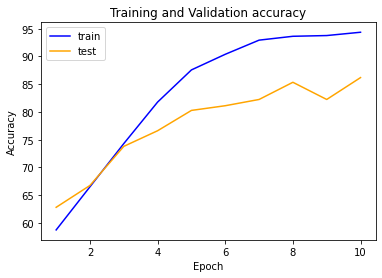

In [ ]:
import matplotlib.pyplot as plt
epoch = range(1,len(train_acc_list_cov)+1)
plt.plot(epoch,train_acc_list_cov,color='blue', label='train')
plt.plot(epoch,val_acc_list_cov,color='orange', label='test')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.title('Training and Validation accuracy')
plt.legend()
plt.show()

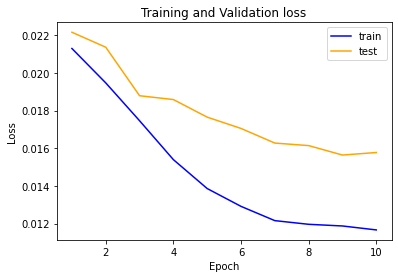

In [ ]:
plt.plot(epoch,train_loss_list_cov,color='blue', label='train')
plt.plot(epoch,val_loss_list_cov,color='orange', label='test')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.title('Training and Validation loss')
plt.legend()
plt.show()

In [ ]:
def test_model(model, dataloader_test):
    model.eval()
    total_test = 0
    correct_test =0
    total_acc_test = 0
    total_loss_test = 0
    outputs = []
    test_labels=[]
    for data in dataloader_test:
        img = data['img_trams_last_hidden_states'].squeeze().to(device) #img.shape torch.Size([8, 198, 768])
        text = data['text_node_feats'].squeeze().to(device)
        cls_img = data['cls_img'].to(device) # torch.Size([8, 1, 768])
        cls_text = data['cls_text'].to(device)
        label_test = data['label'].to(device)  

        out = model(img,text,cls_img,cls_text)
        outputs += list(out.cpu().data.numpy())
        loss = criterion(out, label_test)
        
        _, predicted_test = torch.max(out.data, 1)
        total_test += label_test.size(0)
        correct_test += (predicted_test == label_test).sum().item()

        total_loss_test += loss.item()
        test_labels.append(label_test)
    acc_test = 100 * correct_test / total_test
    loss_test = total_loss_test/total_test   
    
    print(f'acc: {acc_test:.4f} loss: {loss_test:.4f}')
    return outputs,test_labels          

In [ ]:
def model_evaluation(model, dataloader_test, model_name):
    outputs,ls_truth = test_model(model, dataloader_test)
    # Multiclass setting - Harmful
    y_pred=[]
    for i in outputs:
    #     print(np.argmax(i))
        y_pred.append(np.argmax(i))
    # # np.argmax(outputs[:])
    # outputs

    # # Multiclass setting
    aa = []
    for batch in ls_truth:
        aa+=batch

    return y_pred, aa

In [ ]:
y_pred,aa = model_evaluation(model, dataloader_test_cov,"Stage 2-2")
ls = []
for i in aa:
    ls.append(i.item())
rec = np.round(recall_score(ls, y_pred, average="macro"),4)
prec = np.round(precision_score(ls, y_pred, average="macro"),4)
f1 = np.round(f1_score(ls, y_pred, average="macro"),4)
# hl = np.round(hamming_loss(test_labels, y_pred),4)
acc = np.round(accuracy_score(ls, y_pred),4)
mae = np.round(mean_absolute_error(ls, y_pred),4)
print("recall_score\t: ",rec)
print("precision_score\t: ",prec)
print("f1_score\t: ",f1)
# print("hamming_loss\t: ",hl)
# print("accuracy_score\t: ",f1)
print(classification_report(ls, y_pred))

acc: 86.1972 loss: 0.0158
recall_score	:  0.8624
precision_score	:  0.8622
f1_score	:  0.862
              precision    recall  f1-score   support

           0       0.88      0.85      0.86       182
           1       0.84      0.88      0.86       173

    accuracy                           0.86       355
   macro avg       0.86      0.86      0.86       355
weighted avg       0.86      0.86      0.86       355

